In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [3]:
from google.colab import files
uploaded = files.upload()


Saving mental_health_workplace_survey.csv to mental_health_workplace_survey.csv


In [4]:
df = pd.read_csv('mental_health_workplace_survey.csv')

In [5]:
df.drop(columns=['EmployeeID', 'Country'], inplace=True)

In [6]:
target = 'StressLevel'
categorical_cols = ['Gender', 'JobRole', 'Department', 'RemoteWork',
                    'HasMentalHealthSupport', 'HasTherapyAccess', 'SalaryRange']
numerical_cols = df.drop(columns=categorical_cols + [target]).select_dtypes(include=['int64', 'float64']).columns.tolist()


In [7]:
df['Stress_Work_Interaction'] = df['StressLevel'] * df['WorkHoursPerWeek']
df['Sleep_Stress_Interaction'] = df['SleepHours'] / (df['StressLevel'] + 1)

In [8]:
numerical_cols.extend(['Stress_Work_Interaction', 'Sleep_Stress_Interaction'])

In [9]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

In [10]:
X = df.drop(columns=[target])
y = df[target]


In [11]:
X_processed = preprocessor.fit_transform(X)

In [12]:
mi_scores = mutual_info_regression(X_processed, y)
top_features_idx = np.argsort(mi_scores)[-20:]  # Select top 20 features
X_selected = X_processed[:, top_features_idx]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [14]:
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'R²': r2_score(y_test, y_pred)
    }


In [15]:
print("Model Performance on StressLevel Prediction:\n")
for name, metrics in results.items():
    print(f"{name} Regression:")
    print(f"  MSE  = {metrics['MSE']:.4f}")
    print(f"  R²   = {metrics['R²']:.4f}")
    print("-" * 30)

Model Performance on StressLevel Prediction:

Linear Regression:
  MSE  = 0.6909
  R²   = 0.8957
------------------------------
Ridge Regression:
  MSE  = 0.6909
  R²   = 0.8957
------------------------------
Lasso Regression:
  MSE  = 0.6964
  R²   = 0.8948
------------------------------


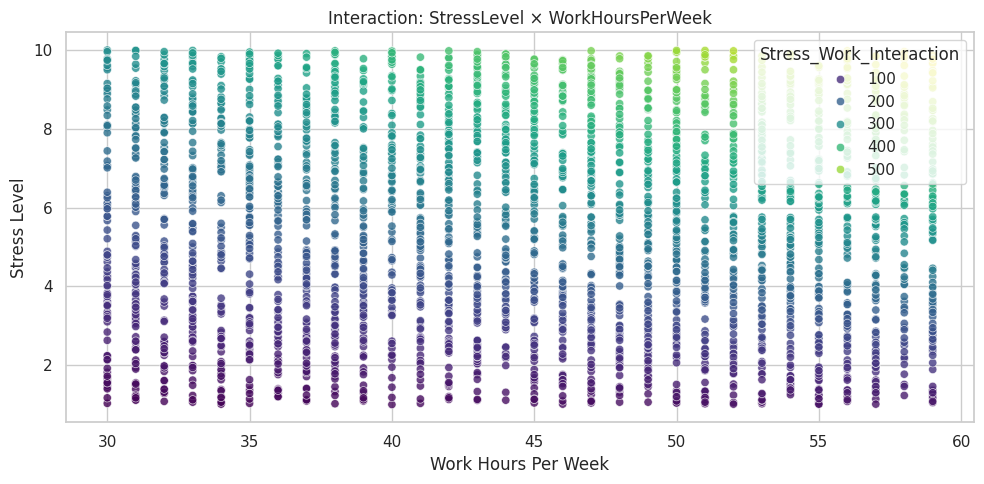

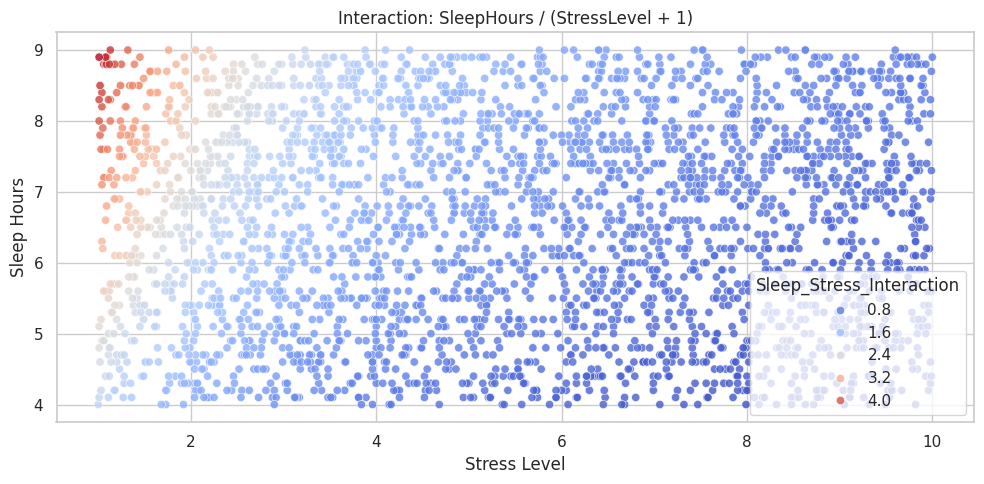

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('mental_health_workplace_survey.csv')


df['Stress_Work_Interaction'] = df['StressLevel'] * df['WorkHoursPerWeek']
df['Sleep_Stress_Interaction'] = df['SleepHours'] / (df['StressLevel'] + 1)


sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['WorkHoursPerWeek'], y=df['StressLevel'],
                hue=df['Stress_Work_Interaction'], palette="viridis", alpha=0.8)
plt.title("Interaction: StressLevel × WorkHoursPerWeek")
plt.xlabel("Work Hours Per Week")
plt.ylabel("Stress Level")
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['StressLevel'], y=df['SleepHours'],
                hue=df['Sleep_Stress_Interaction'], palette="coolwarm", alpha=0.8)
plt.title("Interaction: SleepHours / (StressLevel + 1)")
plt.xlabel("Stress Level")
plt.ylabel("Sleep Hours")
plt.tight_layout()
plt.show()
